<a href="https://colab.research.google.com/github/giohb777/AdvancedAnalytics/blob/main/Multiple_Linear_Regression_(MLR)_analysis_on_Pay_Gaps_across_different_industries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Libraries & Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from statsmodels.api import qqplot

In [ ]:

# Creating one single column for a set of binary columns with the names of those binary columns
def one_category_column(row, category_columns):
    for col in category_columns:
        if row[col] == 1:
            return col

In [ ]:
df = pd.read_csv("/content/CurrentPopulationSurvey.csv", sep=",")

sparsity = df['educ99'].isna().sum() / df.shape[0]
print(sparsity*100)


25.38928277861203


In [ ]:

df.info()

occupation_columns =['manager', 'business', 'financialop', 'computer', 'architect', 'scientist', 'socialworker',
'postseceduc', 'legaleduc', 'artist', 'lawyerphysician', 'healthcare', 'healthsupport', 'protective',
'foodcare', 'building', 'sales', 'officeadmin', 'farmer', 'production', 'transport', 'constructextractinstall']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344287 entries, 0 to 344286
Columns: 234 entries, year to LEHS
dtypes: float64(85), int64(146), object(3)
memory usage: 614.6+ MB


In [ ]:
df['Occupation'] = df.apply(one_category_column, category_columns=occupation_columns, axis=1)
df[occupation_columns + ['Occupation']]


,manager,business,financialop,computer,architect,scientist,socialworker,postseceduc,legaleduc,artist,...,protective,foodcare,building,sales,officeadmin,farmer,production,transport,constructextractinstall,Occupation
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,officeadmin
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,officeadmin
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,architect
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,computer
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,manager
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344282,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,socialworker
344283,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,manager
344284,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,sales
344285,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,artist


In [ ]:
df = df.drop(occupation_columns, axis=1)

In [ ]:
industry_columns = ['Agriculture', 'miningconstruction', 'durables', 'nondurables', 'Transport', 'Utilities',
                    'Communications', 'retailtrade', 'wholesaletrade', 'finance', 'SocArtOther', 'hotelsrestaurants',
                    'Medical','Education', 'professional', 'publicadmin']

In [ ]:
df['Industry'] = df.apply(one_category_column, category_columns=industry_columns, axis=1)
df[industry_columns + ['Industry']]


,Agriculture,miningconstruction,durables,nondurables,Transport,Utilities,Communications,retailtrade,wholesaletrade,finance,SocArtOther,hotelsrestaurants,Medical,Education,professional,publicadmin,Industry
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,SocArtOther
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,hotelsrestaurants
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,durables
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,professional
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,professional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344282,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Education
344283,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Agriculture
344284,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,retailtrade
344285,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,professional


In [ ]:
df = df.drop(industry_columns, axis=1)

In [ ]:

# List of relevant columns
selected_columns = [  'year', 'statefip', 'age',  'marst', 'educ99', 'adj_occ2', 'ind', 'wkswork1', 'uhrswork', 'incwage', 'Industry','Occupation']



In [ ]:
# Create a new DataFrame with the selected columns
df = df[selected_columns].copy()

In [ ]:
print(df.isnull().sum())

df.dropna(inplace=True)

year              0
statefip          0
age               0
marst             0
educ99        87412
adj_occ2          0
ind               0
wkswork1          0
uhrswork          0
incwage           0
Industry          0
Occupation        0
dtype: int64


In [ ]:
df= df[df['wkswork1'] == 52]
df= df[df['uhrswork'] == 40]

df = df.drop(['wkswork1', 'uhrswork'], axis=1)


df['educ99'] = df['educ99'].astype('int64')

df = df.rename(columns={'incwage': 'income',
                        'statefip': 'state',
                        'marst': 'marital',
                        'educ99': 'education',
                        'adj_occ2':'occupation',
                        'ind':'industry'
                         })

In [ ]:

df.head(5)
df.dtypes


,0
year,int64
state,int64
age,int64
marital,int64
education,int64
occupation,int64
industry,int64
income,float64
Industry,object
Occupation,object


count    123819.000000
mean       2008.417424
std           4.323714
min        1999.000000
25%        2007.000000
50%        2009.000000
75%        2011.000000
max        2013.000000
Name: year, dtype: float64
Median: 2009.0


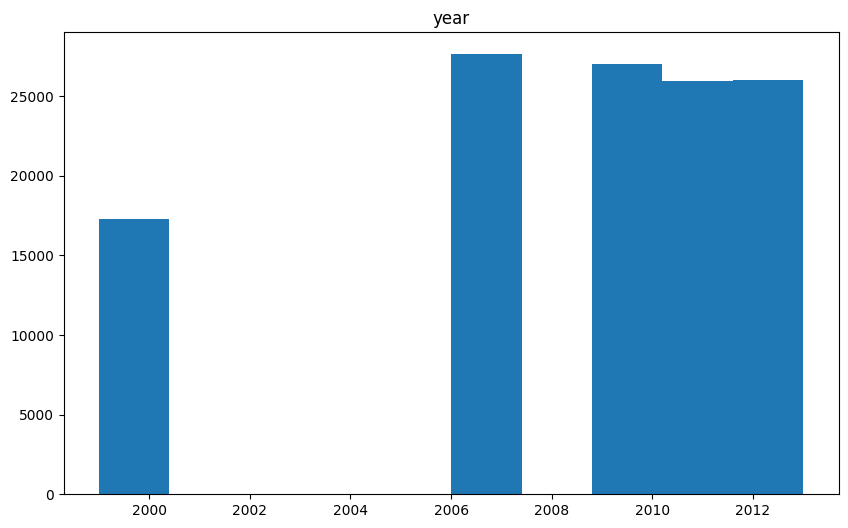

count    123819.000000
mean         27.577819
std          16.004171
min           1.000000
25%          12.000000
50%          27.000000
75%          41.000000
max          56.000000
Name: state, dtype: float64
Median: 27.0


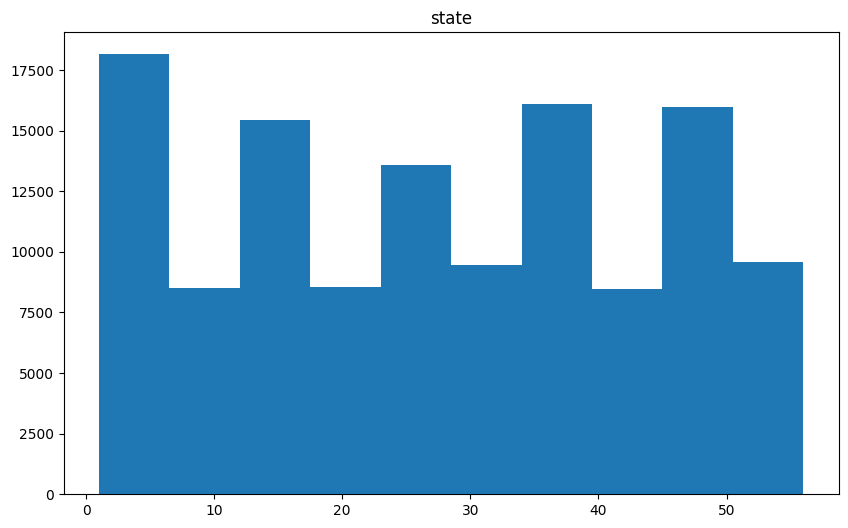

count    123819.000000
mean         42.419701
std          10.250949
min          25.000000
25%          34.000000
50%          42.000000
75%          50.000000
max          64.000000
Name: age, dtype: float64
Median: 42.0


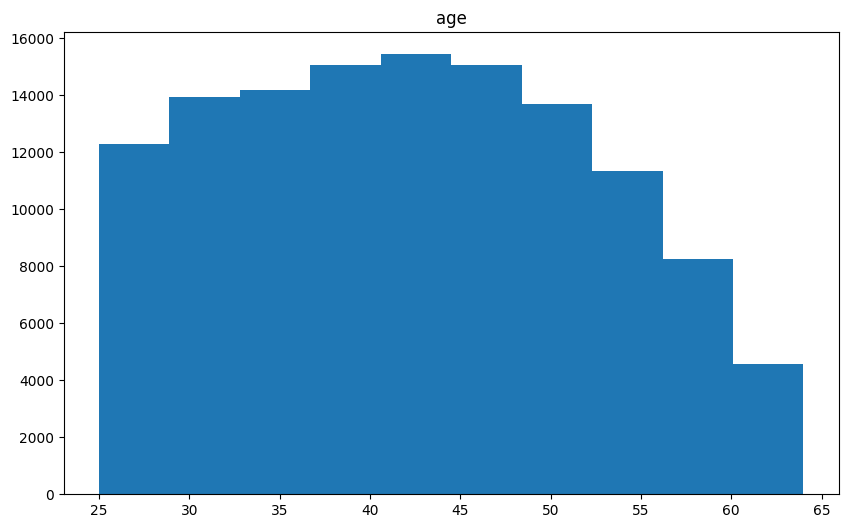

count    123819.000000
mean          2.378916
std           2.005274
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max           6.000000
Name: marital, dtype: float64
Median: 1.0


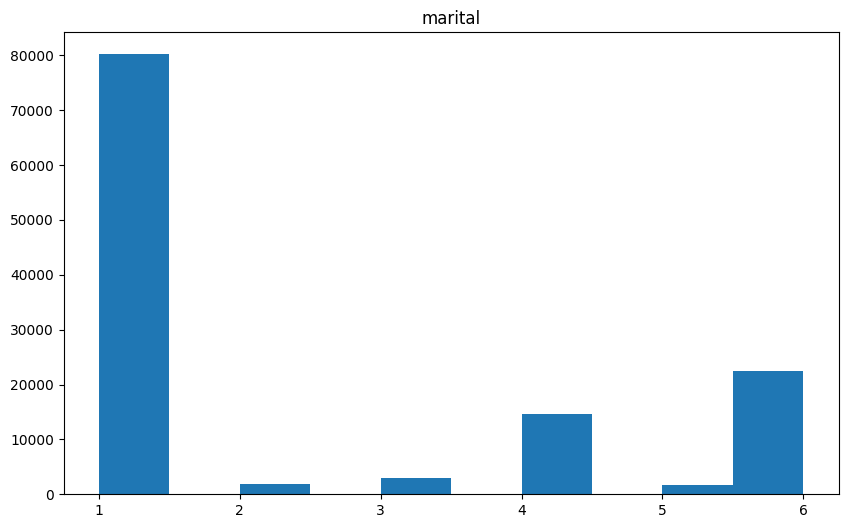

count    123819.000000
mean         11.964230
std           2.967196
min           1.000000
25%          10.000000
50%          11.000000
75%          15.000000
max          18.000000
Name: education, dtype: float64
Median: 11.0


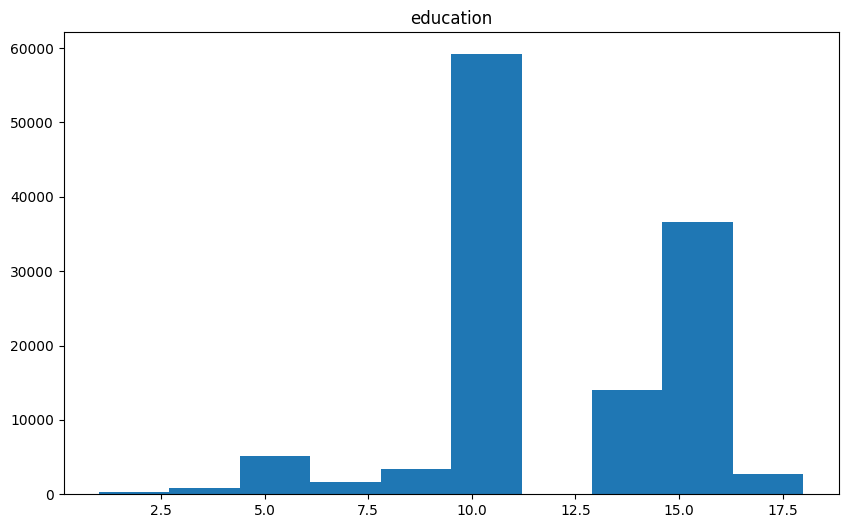

count    123819.000000
mean         36.073963
std          15.679599
min          10.000000
25%          26.000000
50%          36.000000
75%          50.000000
max          62.000000
Name: occupation, dtype: float64
Median: 36.0


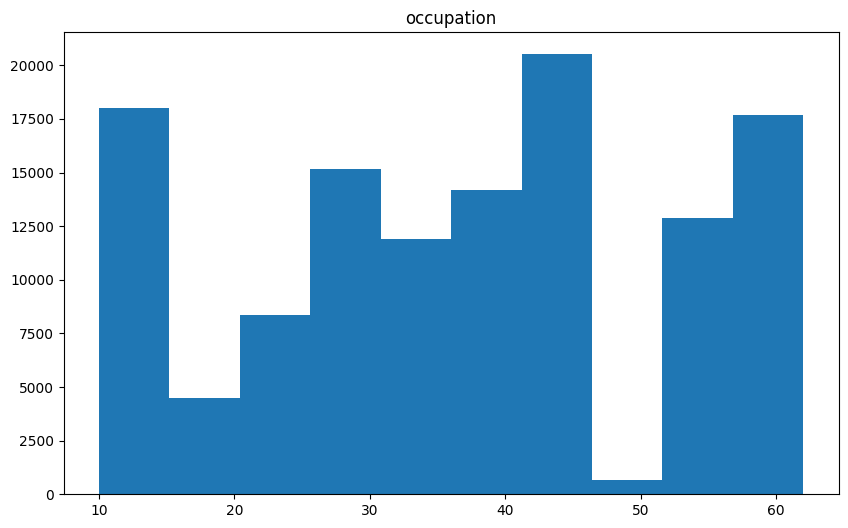

count    123819.000000
mean       5427.449519
std        3173.651132
min          10.000000
25%        2190.000000
50%        6870.000000
75%        8090.000000
max        9590.000000
Name: industry, dtype: float64
Median: 6870.0


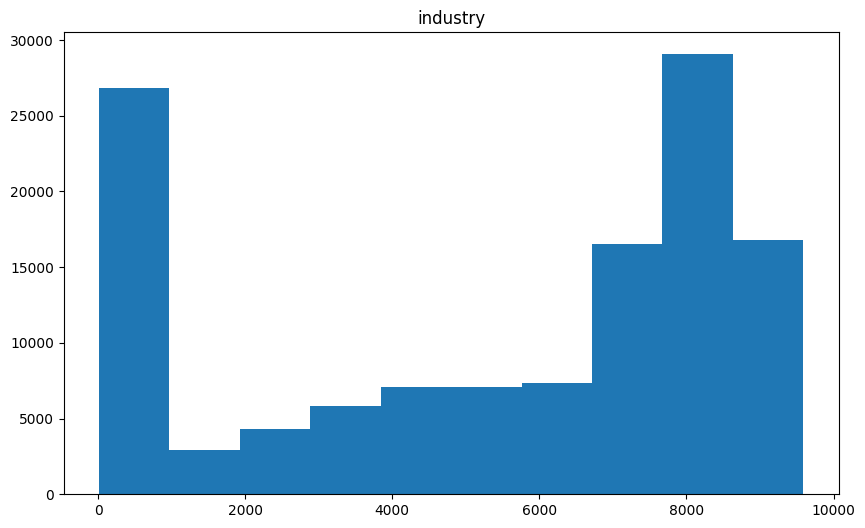

count    1.238190e+05
mean     4.527601e+04
std      3.895440e+04
min      3.400000e+03
25%      2.500000e+04
50%      3.700000e+04
75%      5.500000e+04
max      1.259999e+06
Name: income, dtype: float64
Median: 37000.0


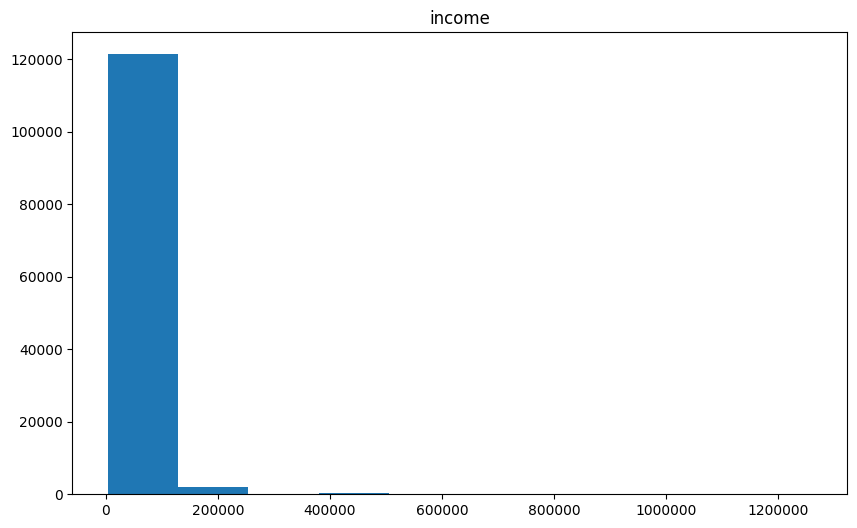

In [ ]:

#Checking Visually for Outliers
for i in df.columns:
  if df[i].dtypes !='object':
      print(df[i].describe())
      print("Median:",  df[i].median())
      plt.figure(figsize=(10, 6))
      plt.ticklabel_format(useOffset=False, style='plain')
      plt.hist(df[i])
      plt.title(i)
      plt.show()


<Figure size 1000x600 with 0 Axes>

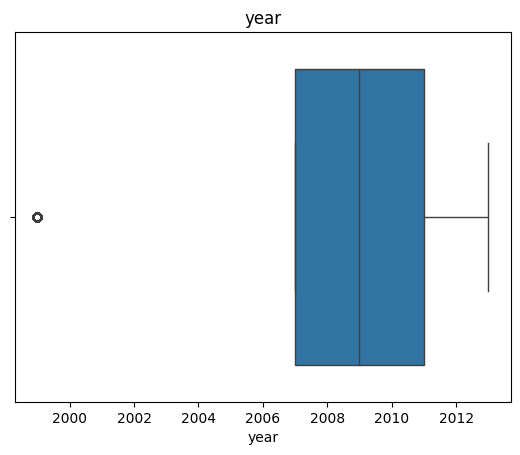

<Figure size 1000x600 with 0 Axes>

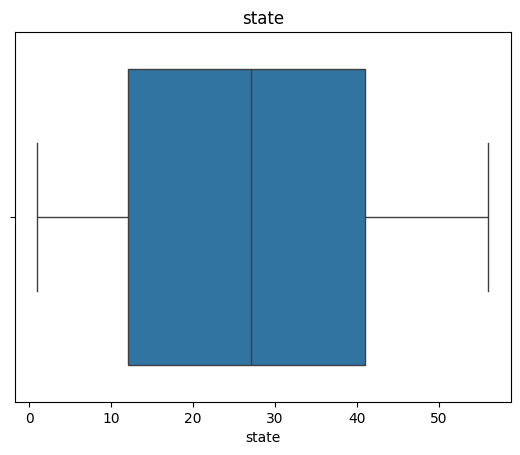

<Figure size 1000x600 with 0 Axes>

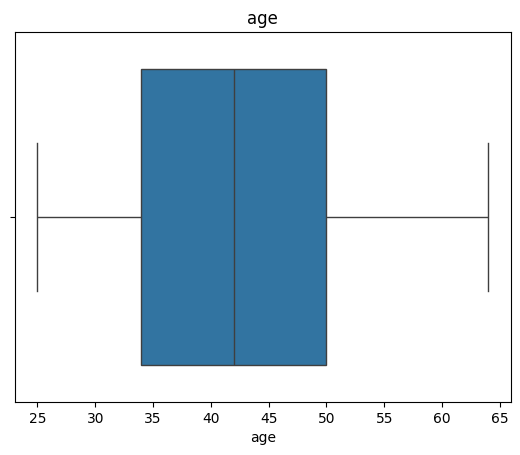

<Figure size 1000x600 with 0 Axes>

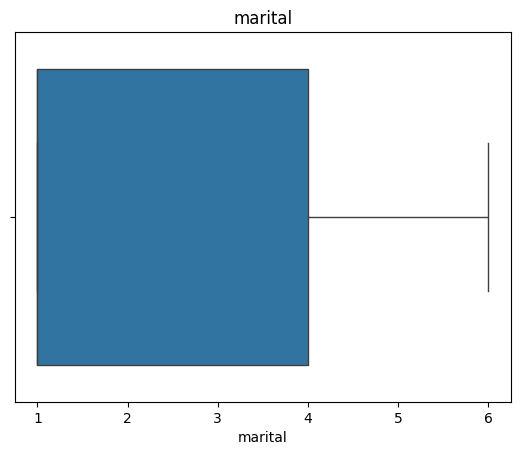

<Figure size 1000x600 with 0 Axes>

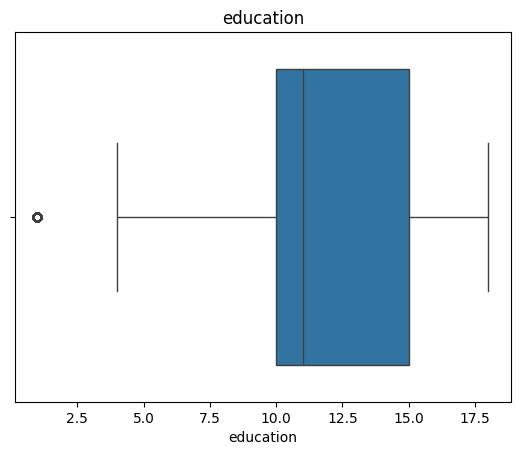

<Figure size 1000x600 with 0 Axes>

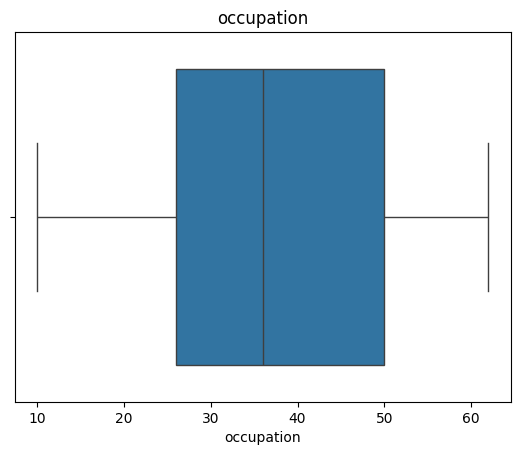

<Figure size 1000x600 with 0 Axes>

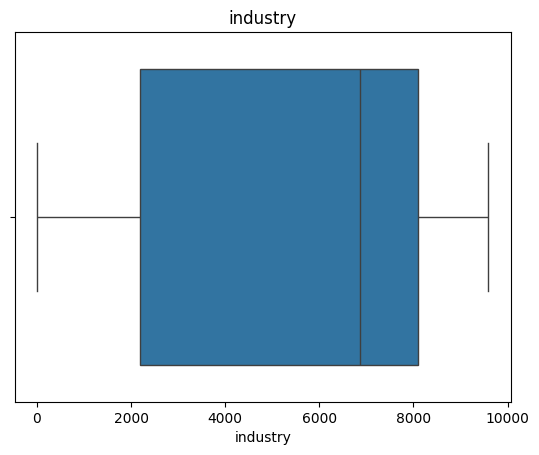

<Figure size 1000x600 with 0 Axes>

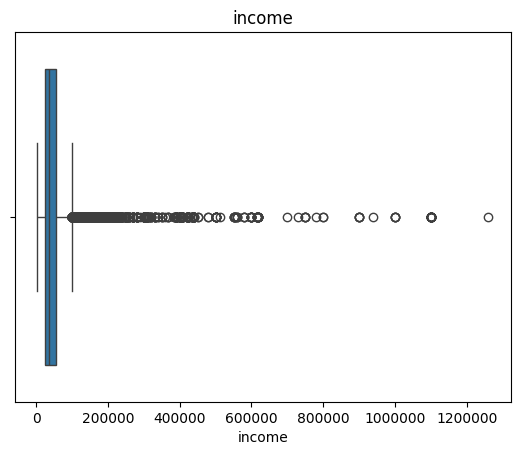

In [ ]:

for i in df.columns:
    if df[i].dtypes !='object':
          plt.figure(figsize=(10, 6))
          plt.figure(i)
          plt.title(i)
          plt.ticklabel_format(useOffset=False, style='plain')
          sns.boxplot(x=df[i],data=df)


df = df[df['income'] <=200000]

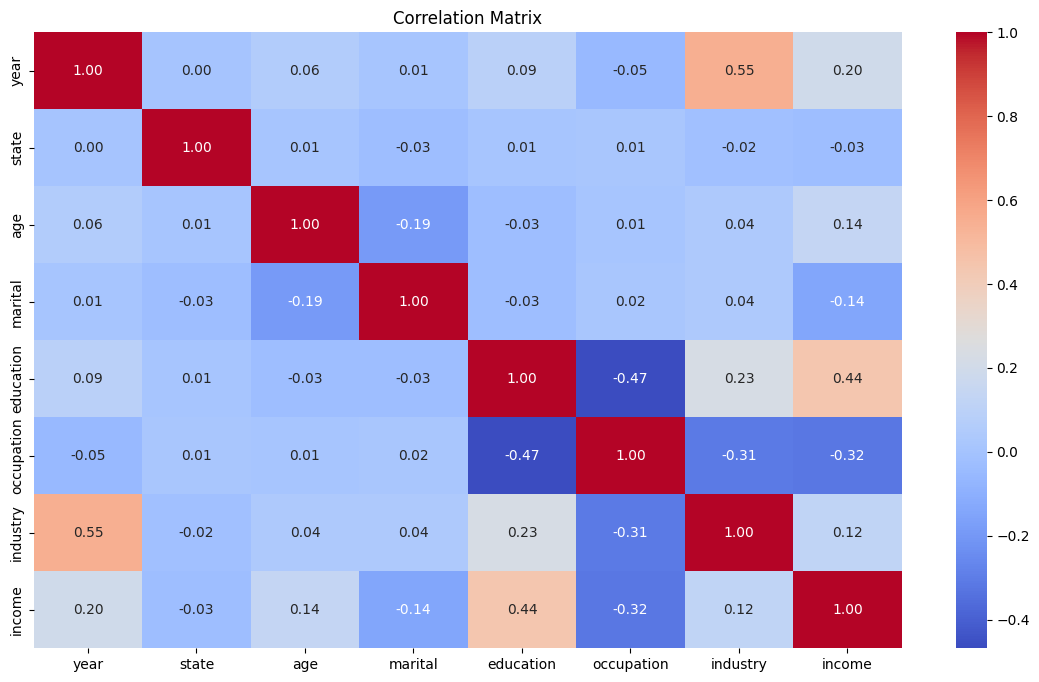

In [21]:

# Correlation matrix
plt.figure(figsize=(14, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [22]:


# Define the dependent and independent variables
X = df[['state' , 'marital',   'age' ,
        'education','occupation',
        'industry']].assign(const=1)
y = df['income']


In [23]:
# Fit the regression model
mdl = sm.OLS(y, X).fit()
mdl.resid.std(ddof=X.shape[1])

22972.735682691058

In [24]:

# Print the model summary
print(mdl.summary())


                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     6595.
Date:                Tue, 01 Oct 2024   Prob (F-statistic):               0.00
Time:                        12:47:18   Log-Likelihood:            -1.4128e+06
No. Observations:              123268   AIC:                         2.826e+06
Df Residuals:                  123261   BIC:                         2.826e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
state        -54.6081      4.092    -13.345      0.0

In [25]:

x_VIF_Original = df[['state'  , 'marital', 'education','occupation',  'industry']]


VIF = pd.DataFrame()
VIF["independant variable"] = x_VIF_Original.columns

 # calculating VIF for each feature
VIF["VIF"] = [vif(x_VIF_Original.values, i)
                           for i in range(len(x_VIF_Original.columns))]

print(VIF)

  independant variable       VIF
0                state  3.748091
1              marital  2.341915
2            education  7.941817
3           occupation  4.040526
4             industry  4.051119


In [26]:

lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=5, scoring='r2')
print("Cross-Validation R-squared Scores:", scores)
print("Mean Cross-Validation R-squared Score:", scores.mean())

Cross-Validation R-squared Scores: [0.21181365 0.2223061  0.24328091 0.15083386 0.11260644]
Mean Cross-Validation R-squared Score: 0.18816819277736574


In [30]:

# Define new data for prediction
new_data = pd.DataFrame({
     'const': [1, 1],
    'education': [10, 15],
    'occupation': [42, 32],
    'marital': [6, 1],
    'industry': [8660, 910],
    'state': [5, 10]
})


In [32]:

#Remove Age
X = df[['state' , 'marital',
        'education','occupation',
        'industry']].assign(const=1)
y = df['income']

# Fit the regression model
mdl = sm.OLS(y, X).fit()


# Add a constant to the new data
new_data = sm.add_constant(new_data)

# Predict salaries
predicted_salaries = mdl.predict(new_data)
print(predicted_salaries)

0    214712.339153
1    271420.599947
dtype: float64


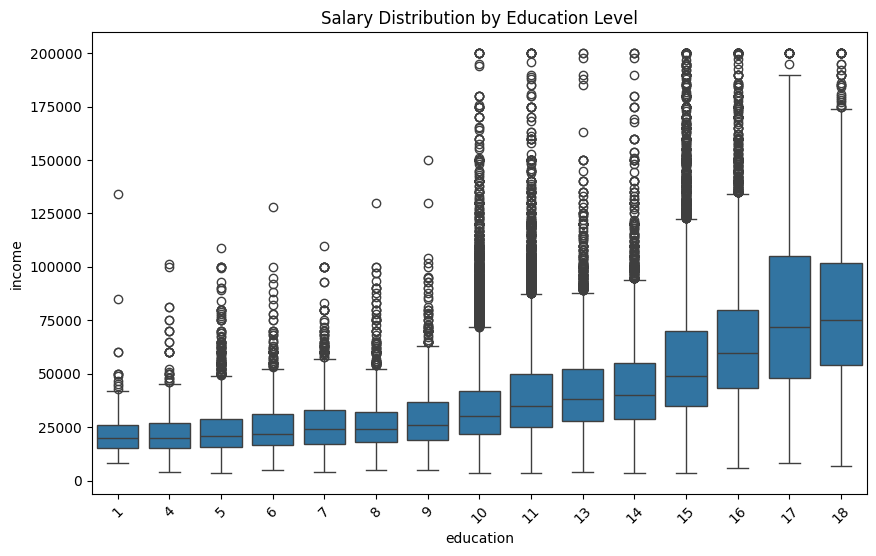

In [33]:

# Salary distribution by education level
plt.figure(figsize=(10, 6))
sns.boxplot(x='education', y='income', data=df)
plt.title('Salary Distribution by Education Level')
plt.xticks(rotation=45)
plt.show()

In [34]:

# Average Income by Occupation
# Calculate the mean income for each occupation and sort
mean_income_by_occupation = df.groupby('Occupation')['income'].mean().sort_values(ascending=False)

# Reorder the original dataframe based on the sorted order
df['Occupation'] = pd.Categorical(df['Occupation'], categories=mean_income_by_occupation.index, ordered=True)

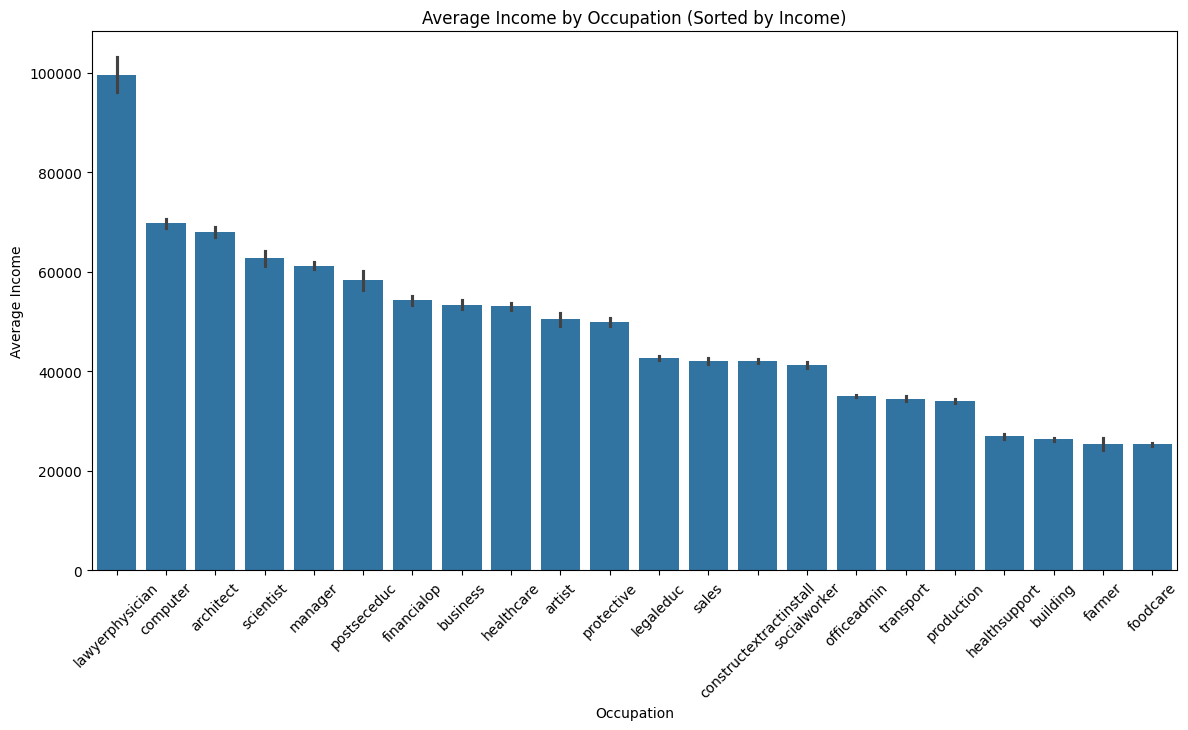

In [35]:

# Create the bar plot
plt.figure(figsize=(14, 7))
sns.barplot(x='Occupation', y='income', data=df, estimator=np.mean, order=mean_income_by_occupation.index)
plt.title('Average Income by Occupation (Sorted by Income)')
plt.xlabel('Occupation')
plt.ylabel('Average Income')
plt.xticks(rotation=45)
plt.show()


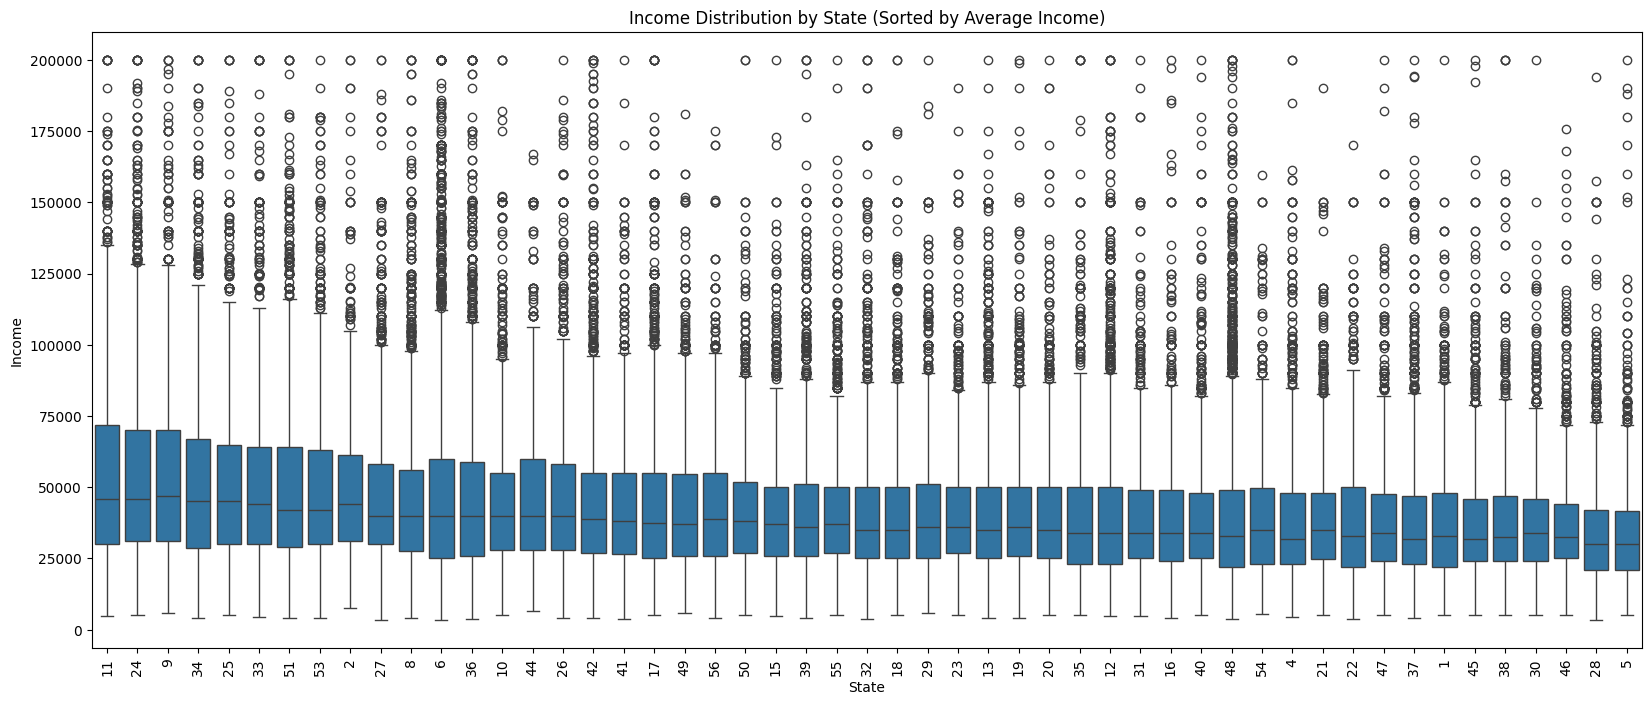

In [36]:

# Average Income by State
# Calculate the mean income for each state and sort
mean_income_by_state  = df.groupby('state')['income'].mean().sort_values(ascending=False)

# Reorder the original dataframe based on the sorted order
df['state'] = pd.Categorical(df['state'], categories=mean_income_by_state.index, ordered=True)

# Create the boxplot
plt.figure(figsize=(20, 8))
sns.boxplot(x='state', y='income', data=df, order=mean_income_by_state.index)
plt.title('Income Distribution by State (Sorted by Average Income)')
plt.xlabel('State')
plt.ylabel('Income')
plt.xticks(rotation=90)
plt.show()

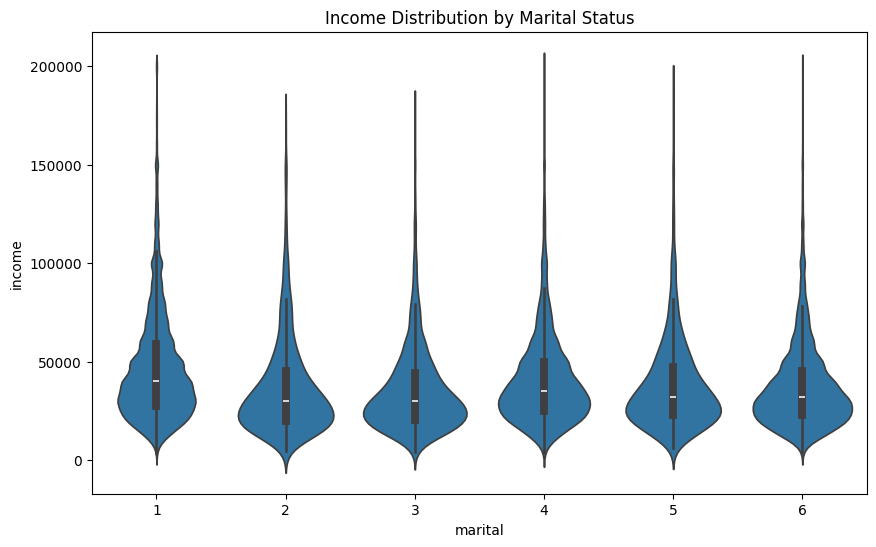

In [37]:

# Income vs. Marital Status
plt.figure(figsize=(10, 6))
sns.violinplot(x='marital', y='income', data=df)
plt.title('Income Distribution by Marital Status')
plt.show()


In [ ]:
pip install squarify

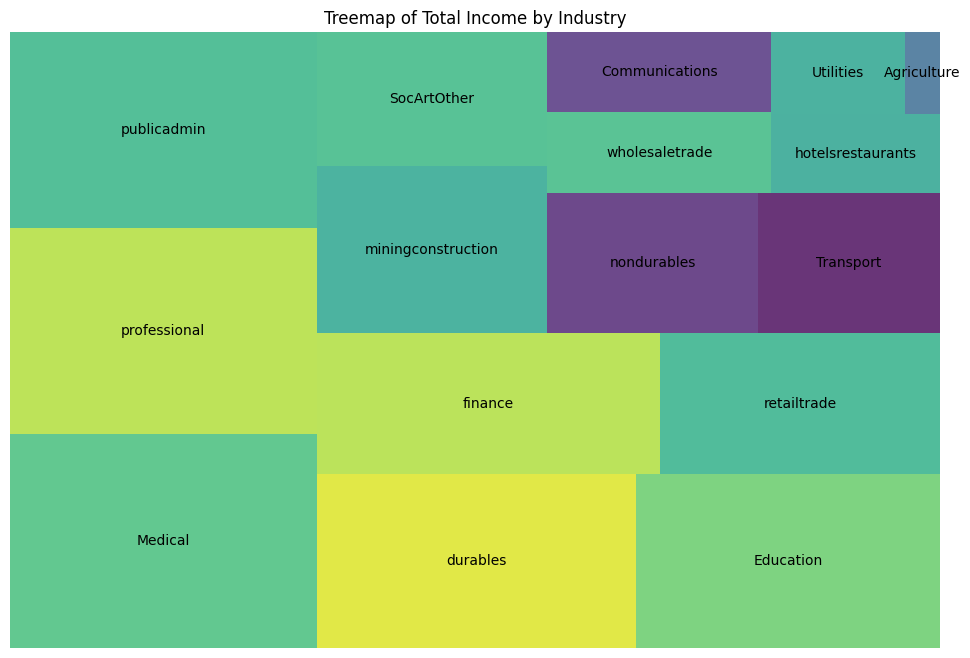

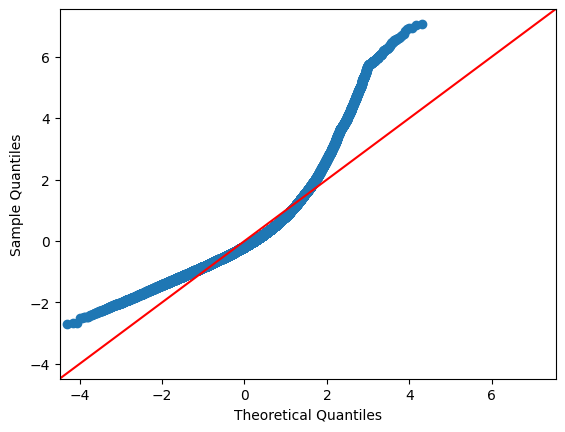

In [42]:

import squarify
# Calculate the total income for each industry
industry_income = df.groupby('Industry')['income'].sum().reset_index()

# Sort industries by total income
industry_income = industry_income.sort_values(by='income', ascending=False)

# Create a treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=industry_income['income'], label=industry_income['Industry'], alpha=0.8)
plt.title('Treemap of Total Income by Industry')
plt.axis('off')
plt.show()



#QQ plot of  Model
qqplot( data=mdl.resid, fit=True, line ="45"  )
plt.show()
